In [1]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from Ldate import Ldate
from LyAdata24 import read_df
from gbarDataLoader24 import loadShortSummary
from readTrc_4CH import Trc
import scipy.optimize as scio

In [2]:
df = read_df()
df = df[[True if (val == 408 or val == 409) else False for val in df['run']]]

In [3]:
df

,Date,Time,LyA,MCP5_picture,MCP5_Waveform,run,microwave,NE50_I,time_ch1,height_ch1,time_ch2,height_ch2,time_ch3,height_ch3,time_ch4,height_ch4,MCP5_volt_sum,beam_start,beam_stop
0,24_04_30,1714463793.481,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,9.834,None,None,None,None,None,None,None,None,3.38492,0.000005,0.000006
1,24_04_30,1714463807.482,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,1.683,None,None,None,None,None,None,None,None,1.160492,0.000005,0.000006
2,24_04_30,1714463821.481,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,9.569,None,None,None,None,None,None,None,None,4.225879,0.000005,0.000006
3,24_04_30,1714463835.481,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,10.604,None,None,None,None,None,None,None,None,3.815755,0.000005,0.000006
4,24_04_30,1714463850.481,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,8.428,None,None,None,None,None,None,None,None,3.115765,0.000005,0.000006
5,24_04_30,1714463864.481,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,9.69,None,None,None,None,None,None,None,None,3.623654,0.000005,0.000006
6,24_04_30,1714463900.482,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,8.232,None,None,None,None,None,None,None,None,4.11649,0.000005,0.000006
7,24_04_30,1714463914.481,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,9.18,None,None,None,None,None,None,None,None,3.625591,0.000005,0.000006
8,24_04_30,1714463928.483,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,9.271,None,None,None,None,None,None,None,None,3.428156,0.000005,0.000006
9,24_04_30,1714463942.482,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,408.0,off,9.146,None,None,None,None,None,None,None,None,3.47578,0.000005,0.000006


In [5]:
cfoil_in = []
cfoil_out = []

for i in range(9):
    try:
        curr = Trc().open(df['MCP5_Waveform'].iloc[i])
    except:
        print('the file at position ' + str(i) + ' is corrupt')
    else:
        cfoil_in += [curr]
    
for i in range(10):
    try:
        curr = Trc().open(df['MCP5_Waveform'].iloc[i + 9])
    except:
        print('the file at position ' + str(i+9) + ' is corrupt')
    else: 
        cfoil_out += [curr]

the file at position 14 is corrupt


In [6]:
x_in = [cfoil_in[0][0][2], cfoil_in[1][0][2], cfoil_in[2][0][2], cfoil_in[3][0][2], cfoil_in[4][0][2], cfoil_in[5][0][2], cfoil_in[6][0][2], cfoil_in[7][0][2], cfoil_in[8][0][2]]
x_out = [cfoil_out[0][0][2], cfoil_out[1][0][2], cfoil_out[2][0][2], cfoil_out[3][0][2], cfoil_out[4][0][2], cfoil_out[5][0][2], cfoil_out[6][0][2], cfoil_out[7][0][2], cfoil_out[8][0][2]]

y_in = [cfoil_in[0][1][2], cfoil_in[1][1][2], cfoil_in[2][1][2], cfoil_in[3][1][2], cfoil_in[4][1][2], cfoil_in[5][1][2], cfoil_in[6][1][2], cfoil_in[7][1][2], cfoil_in[8][1][2]]
y_out = [cfoil_out[0][1][2], cfoil_out[1][1][2], cfoil_out[2][1][2], cfoil_out[3][1][2], cfoil_out[4][1][2], cfoil_out[5][1][2], cfoil_out[6][1][2], cfoil_out[7][1][2], cfoil_out[8][1][2]]

In [7]:
for i in range(9):
    x_in[i] = [10e5 * (val - x_in[i][0]) for val in x_in[i]]
    x_out[i] = [10e5 * (val - x_out[i][0]) for val in x_out[i]]
    
    av_in = np.average(y_in[i][3000:6000])
    y_in[i] = [1000 * (val - av_in) for val in y_in[i]]
    av_out = np.average(y_out[i][3000:6000])
    y_out[i] = [1000 * (val - av_out) for val in y_out[i]]

In [28]:
n = 50

xa_in = [val[::n] for val in x_in]
xa_out = [val[::n] for val in x_out]

ya_in = np.zeros((9,len(xa_in[0])))
ya_out = np.zeros((9,len(xa_out[0])))

for k in range(9):
    for i in range(len(xa_in[0])):
        ya_in[k][i] = np.average(y_in[k][i * n: (i+1) * n])
        ya_out[k][i] = np.average(y_out[k][i * n: (i+1) * n])

In [29]:
totya_in = np.zeros(len(ya_in[0]))
totya_out = np.zeros(len(ya_out[0]))

for i in range(len(totya_in)):
    curr_in = 0
    curr_out = 0
    
    for k in range(9):
        curr_in += ya_in[k][i]
        curr_out += ya_out[k][i]
        
    totya_in[i] = curr_in
    totya_out[i] = curr_out
    
maxa_in = max(totya_in)
maxa_out = max(totya_out)

#adja = maxa_out/maxa_in

#totya_in = [val * adja for val in totya_in]

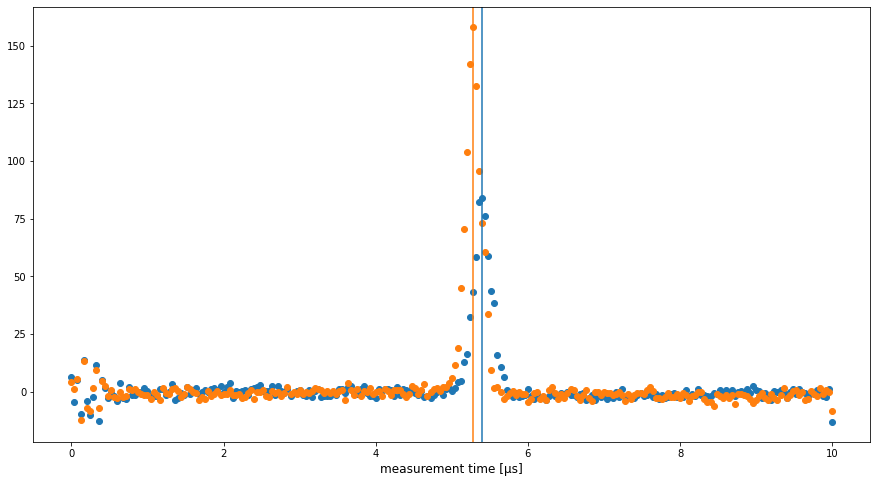

In [128]:
plt.figure(figsize = (15,8))
plt.scatter(xa_in[0], totya_in)
plt.scatter(xa_out[0], totya_out)

ax = plt.gca()
plt.xlabel(xlabel = 'measurement time [μs]', fontsize = 12)

plt.axvline(xa_in[0][np.argmax(totya_in)], color = '#1f77b4')
plt.axvline(xa_out[0][np.argmax(totya_out)], color = '#ff7f0e')

In [8]:
max_in = [np.argmax(val) for val in y_in]
max_out = [np.argmax(val) for val in y_out]

mtime_in = [0] * 9
mtime_out = [0] * 9

for i in range(9):
    mtime_in[i] = x_in[i][max_in[i]]
    mtime_out[i] = x_out[i][max_out[i]]
    
av_in = sum(mtime_in)/9 
av_out = sum(mtime_out)/9

In [9]:
toty_in = np.zeros(len(y_in[0]))
toty_out = np.zeros(len(y_out[0]))

for i in range(len(toty_in)):
    curr_in = 0
    curr_out = 0
    
    for k in range(9):
        curr_in += y_in[k][i]
        curr_out += y_out[k][i]
        
    toty_in[i] = curr_in / 9
    toty_out[i] = curr_out / 9
    
max_in = max(toty_in)
max_out = max(toty_out)

maxx_in = x_in[0][np.argmax(toty_in)]
maxx_out = x_out[0][np.argmax(toty_out)]

#adj = max_out/max_in

#toty_in = [val * adj for val in toty_in]

In [181]:
def fitgaussfunc(x,A,s,m):
    return A/(s*(2*np.pi)**0.5) * np.exp(-1/2 * (x-m)**2/s**2)# + b

def gaussfit(xx, yy, p = [3, 0.1, 5.3]):
    xx = np.array(xx)
    yy = np.array(yy)
    popt, pcov = scio.curve_fit(fitgaussfunc, xx, yy, p0 = p, maxfev = 800)
    return lambda x: popt[0]/(popt[1]*(2*np.pi)**0.5) * np.exp(-1/2 * (x-popt[2])**2/popt[1]**2), popt[1]

In [171]:
sigma = 20
xg = np.linspace(-3*sigma, 3*sigma, 6*sigma+1)
gconv = 1/(sigma*(2*np.pi)**0.5)*np.exp(-1/2*xg**2/sigma**2)
totyg_in = np.convolve(toty_in, gconv, mode = 'full')[3*sigma:-3*sigma]
totyg_out = np.convolve(toty_out, gconv, mode = 'full')[3*sigma:-3*sigma]

In [184]:
x_gfit = np.linspace(0,10,1000)

gfit_in, gsig_in = gaussfit(x_in[0][5500:7800], toty_in[5500:7800])
ggfit_in, ggsig_in = gaussfit(x_in[0][5500:7800], totyg_in[5500:7800])

gfit_out, gsig_out = gaussfit(x_out[0][5500:7800], toty_out[5500:7800])
ggfit_out, ggsig_out = gaussfit(x_out[0][5500:7800], totyg_out[5500:7800])

gmax_in = x_gfit[np.argmax(gfit_in(x_gfit))]
gmax_out = x_gfit[np.argmax(gfit_out(x_gfit))]

ggmax_in = x_gfit[np.argmax(ggfit_in(x_gfit))]
ggmax_out = x_gfit[np.argmax(ggfit_out(x_gfit))]

In [185]:
print(gsig_in, gsig_out)
print()
print(ggsig_in, ggsig_out)

0.11703468801654636 0.10760983647685221

0.11821149493556891 0.10891813200776812


In [163]:
print(maxx_in, maxx_out)
print()
print(gmax_in, gmax_out)
print()
print(ggmax_in, ggmax_out)

5.4328000725356596 5.300000070762589

5.425425425425425 5.305305305305305

5.425425425425425 5.305305305305305


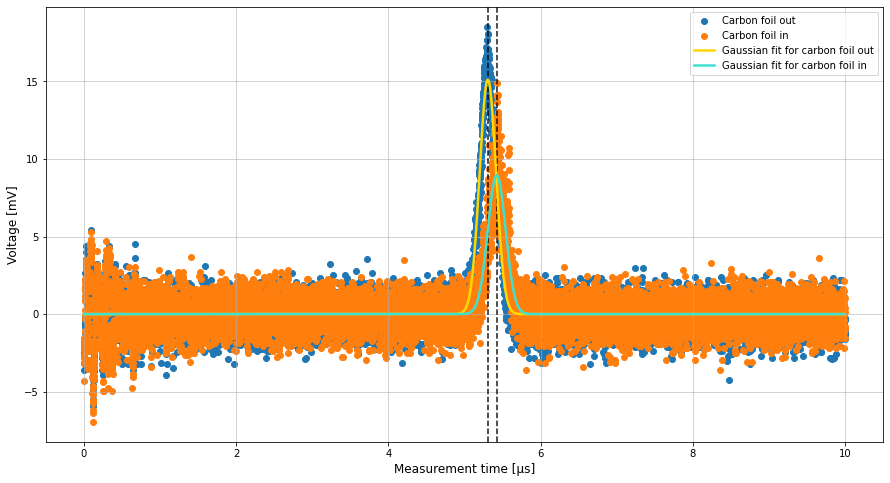

In [179]:
fig = plt.figure(figsize = (15,8))

ax = plt.gca()
plt.xlabel(xlabel = 'Measurement time [μs]', fontsize = 12)
plt.ylabel(ylabel = 'Voltage [mV]', fontsize = 12)
fig.patch.set_alpha(1.0)

plt.grid(visible = True, alpha = 0.7, linestyle = '-')
#plt.rc('axes', axisbelow=True)
plt.scatter(x_out[0], toty_out, alpha = 1, label = 'Carbon foil out', color = '#1f77b4')
plt.scatter(x_in[0], toty_in, alpha = 1, label = 'Carbon foil in', color = '#ff7f0e')

plt.axvline(gmax_in, color = 'black', linestyle = '--', alpha = 0.9)
plt.axvline(gmax_out, color = 'black', linestyle = '--', alpha = 0.9)

plt.plot(x_gfit, gfit_out(x_gfit), color = 'gold', linewidth = 2.5, label = 'Gaussian fit for carbon foil out')
plt.plot(x_gfit, gfit_in(x_gfit), color = 'turquoise', linewidth = 2.5, label = 'Gaussian fit for carbon foil in')

plt.legend(loc = 'upper right')

#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#7f7f7f', '#bcbd22', '#17becf']
#plt.savefig('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/Data analysis/Figures/MCP5 images/runs_408_409-MCP5_volt_charged-neutral.png', dpi = 200)

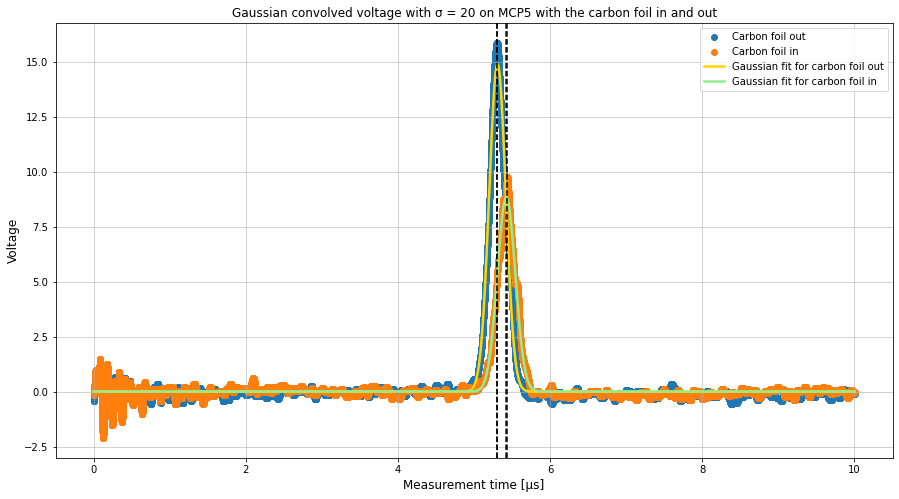

In [174]:
fig = plt.figure(figsize = (15,8))

ax = plt.gca()
plt.xlabel(xlabel = 'Measurement time [μs]', fontsize = 12)
plt.ylabel(ylabel = 'Voltage', fontsize = 12)
plt.title(label = 'Gaussian convolved voltage with σ = ' + str(sigma) + ' on MCP5 with the carbon foil in and out')
fig.patch.set_alpha(1.0)

plt.grid(visible = True, alpha = 0.7, linestyle = '-')
#plt.rc('axes', axisbelow=True)
plt.scatter(x_out[0], totyg_out, alpha = 1, label = 'Carbon foil out', color = '#1f77b4')
plt.scatter(x_in[0], totyg_in, alpha = 1, label = 'Carbon foil in', color = '#ff7f0e')

plt.axvline(gmax_in, color = 'black', linestyle = '--', alpha = 0.9)
plt.axvline(gmax_out, color = 'black', linestyle = '--', alpha = 0.9)

plt.plot(x_gfit, ggfit_out(x_gfit), color = 'gold', linewidth = 2.5, label = 'Gaussian fit for carbon foil out')
plt.plot(x_gfit, ggfit_in(x_gfit), color = 'lightgreen', linewidth = 2.5, label = 'Gaussian fit for carbon foil in')

plt.axvline(maxx_in, color = 'black', linestyle = '--')
plt.axvline(maxx_out, color = 'black', linestyle = '--')
plt.legend(loc = 'upper right')